<a href="https://colab.research.google.com/github/aymanish/PADL-Q1-Principal-Component-Analysis/blob/main/Q1_padl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Q1**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
from itertools import combinations
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load data and check dimensions
data = np.loadtxt('PADL-Q1.csv', delimiter=',',skiprows=1)

print(len(data))
print(len(data[:,0]))
data.shape

200
200


(200, 5)

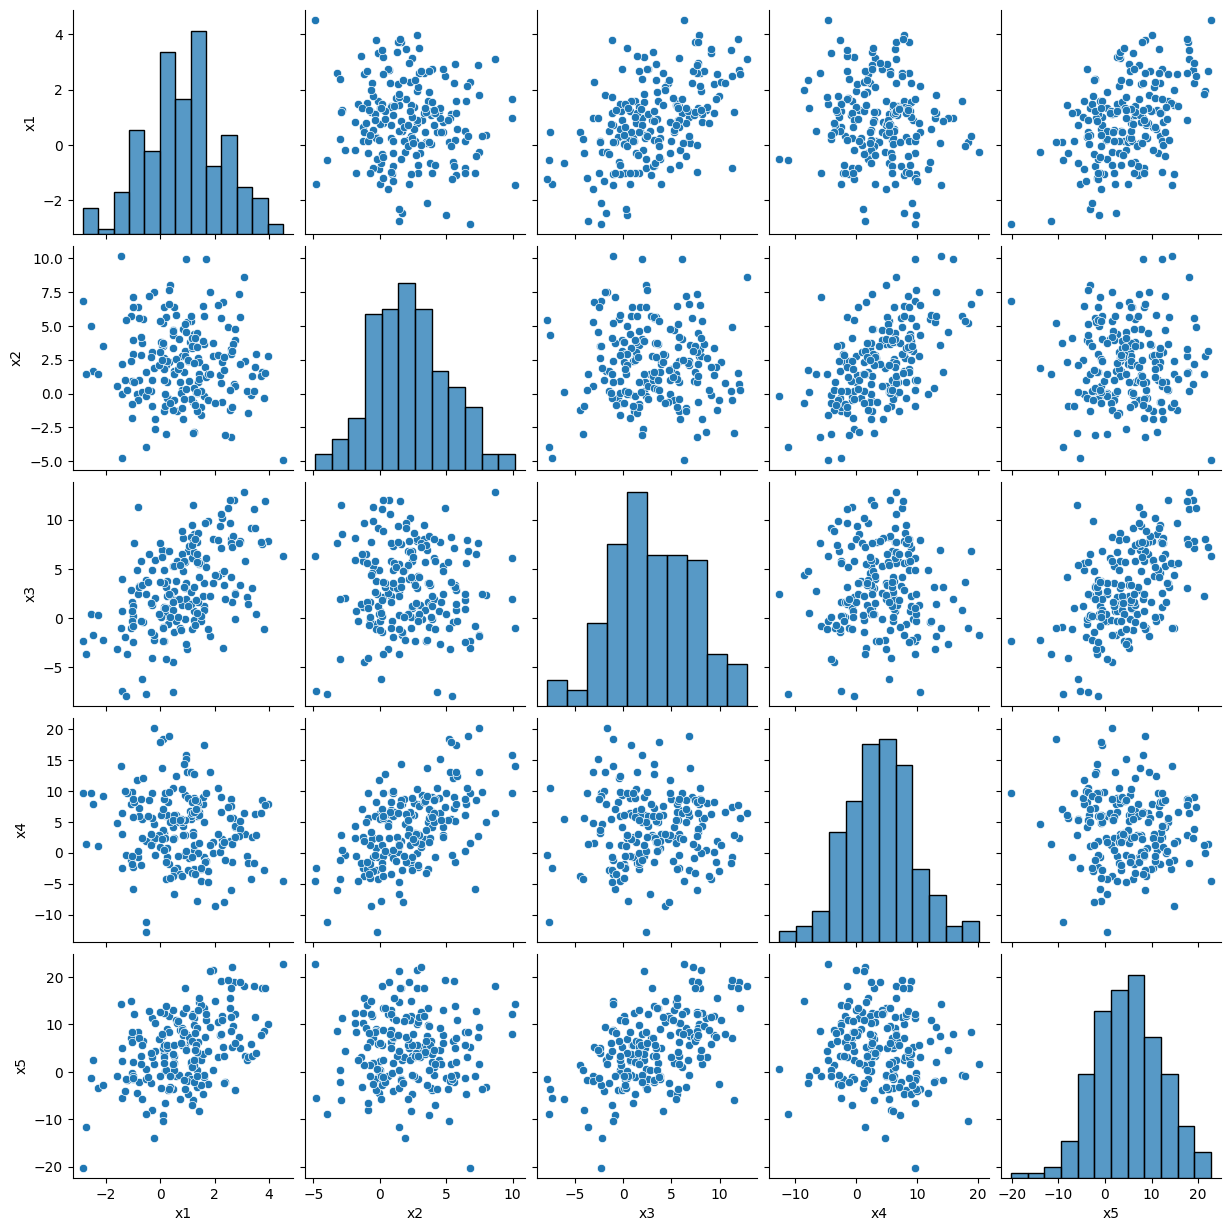

In [ ]:
#Reshape the Gene 1 column into a 10x10 array matching the map:

x1 = data[:,0]
x2 = data[:,1]
x3 = data[:,2]
x4 = data[:,3]
x5 = data[:,4]

variables = [x1, x2, x3, x4, x5]

# Apply pair plot to see correlations
df = pd.DataFrame(data, columns=['x1', 'x2', 'x3', 'x4', 'x5'])

# Use seaborn's pairplot function to plot the pairwise relationships in the dataset
sns.pairplot(df)
# Some minor positive and negative correlations visible

The part answers part (a) of Question 1:

We start by normalising the data. We have had a look at the pair plots and all the data is continuous but without a scale and hence that are eligible to standardise.

The data is scaled using StandardScaler to ensure that each feature has a mean of 0 and a standard deviation of 1. This is important because PCA is sensitive to the variances of the features. If the features have different units or scales, those with larger scales would dominate the principal components, skewing the analysis.


---

PCA is applied to the scaled data, reducing its dimensionality while retaining as much variance as possible. In this case, all 5 principal components are retained, which equals the number of original features. We obtain the principal components pca1 and the transformed data for the pca1 as pac1_data.


---
The explained_variance_ratio_ attribute of the PCA object gives the variance explained by each principal component. We use this and apply cumsum from numpy to obtain the cumulative explained variance ratio. This cumulative variance helps understand how much total variance is explained as more components are included.

Essentially, telling us how much of the data is captured by each component. They all add up to 100% of the variance.


---

Next, we create a bar plot showing the explained variance by each principal component and a step plot for the cumulative explained variance. Each bar represents the percentage of variance explained by an individual principal component, and the step plot shows how the total explained variance increases as more components are included.

Variance explained by each component: [0.4031531  0.29928253 0.11262935 0.10445182 0.0804832 ]


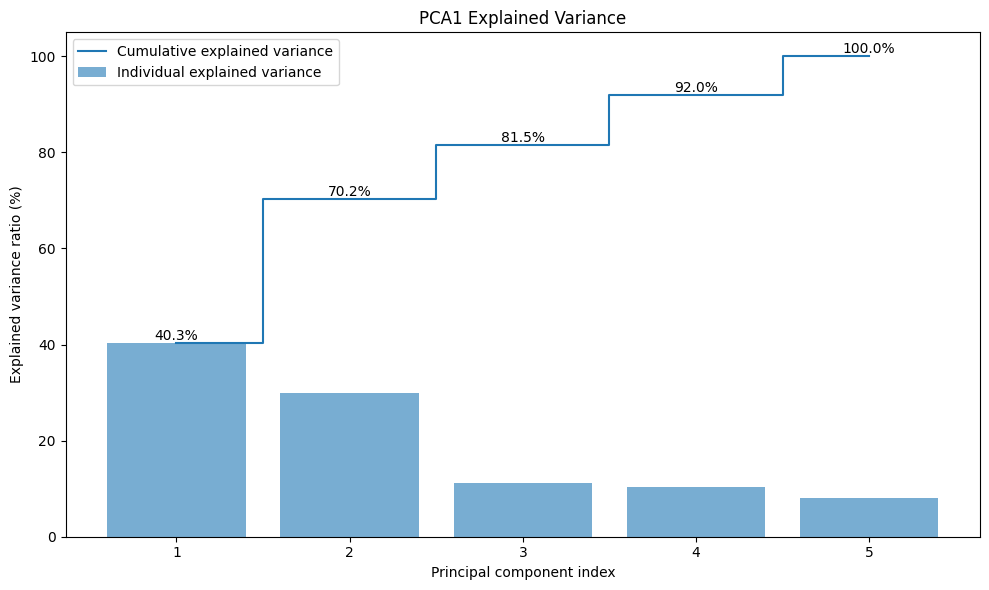

In [ ]:
# Standardize the data
# We are not aware of the nature of the data such as what their units are so it is a good practice to scale them
# Especially since the PCA is sensitive to variances of the features and so they must be normalised.
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply FIRST PCA
pca1 = PCA(n_components=5) # Number of components equal to the number of original features

pca1.fit(data_scaled) # Fit the PCA on the scaled data
pca1_data = pca1.transform(data_scaled) # Transform the data



# Variance Explained
cumulative_variance = np.cumsum(pca1.explained_variance_ratio_)


print("Variance explained by each component:", pca1.explained_variance_ratio_)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(1, 6), pca1.explained_variance_ratio_ * 100, alpha=0.6, align='center',
        label='Individual explained variance')
plt.step(range(1, 6), cumulative_variance * 100, where='mid',
         label='Cumulative explained variance')

# Labeling the cumulative variance percentages
for i, cv in enumerate(cumulative_variance):
    plt.text(i + 1, cv * 100, f"{cv*100:.1f}%", ha='center', va='bottom')

plt.ylabel('Explained variance ratio (%)')
plt.xlabel('Principal component index')
plt.title('PCA1 Explained Variance')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Refering to the code and plot above:

---

PCA is sensitive to the scales of the variables; without scaling, variables with larger scales dominate the variance, which can distort the PCA results. The PCA graph from the scaled data will reflect the relative importance of each variable's variance after normalizing the scale.

From a statistical perspective, PCA on scaled data (using standardization) is typically preferred because it treats all variables equally in terms of their variance. This approach helps to avoid the potential bias introduced by different units and scales of measurement.


---



With scaling / normalizing the dataset we obtain 5 principal compoments where the cumulative explained variance ratio for each component progresses as follows:

* PC1: 40.3%
* PC2: 70.2%
* PC3: 81.5%
* PC4: 92.0%
* PC5: 100%


---

We now need to decide on the Dmin number of principal components from PCA1 to PCA5.

* Ideally, we want the Dmin number of components that account for >= 95% of the cummulative variance which accoutns for almost no loss in information. HOwever, in our case this means taking all five principal components as we only obtain >- 95% at PCA5 (Dmin - 5). But that would not be possible as that would mean there is no point in applying PCA since we only obtain greater than or equal to 95% cumulative variance at PCA5 which is essentally the same as capturing the whole data. There would be no point in dimentionality reduciton as well (going from 5 dimension to 5 dimensions) which is one of the main reasons for applying PCA in the first place

* We could opt for a Dmin = 4, by reducing our criteria from a strict 95% to around 90%. This would allow us to obtian a cumulativ evariance of 92% by taking PCA1 to PCA4. While this is still retaining more than 90% information it is still hard to visualise in 4 dimensions. We are only losing one dimension as well which still makes it hard to visualise the data but also higher dimensions make it hard for machine learning algorithms to process them. So 4 and 5 dimensions is not ideal in practicality.

Hence, we decided on a Dmin = 3. This accoutns for 81.5% of the variance in the data. This is still a significant portion of the total variance, meaning these three components capture most of the important information in the dataset.

* While we were initialyl strict we should aim for a balance between good variance coverage and low dimensions for practicality. Typically, 80% variance coverage is still a good criterion.
* Reducing from 5 dimensions to 3 simplifies the dataset, making it easier to analyze and visualize without losing much information.
* A lower number of dimensions can also help improve the performance of machine learning algorithms by reducing noise and overfitting.
* Using only the first three components strikes a good balance between simplicity and information retention.
This reduces the complexity of the model while retaining most of the data's variance.


---



The code below refers to part (b) of question 1:

Based on our analysis we choose a criterion of 80% variance coverage. In order to automate this the code below uses argmax to select the closest number of dimensions that meets the criteria.

As discussed, in our case this is Dmin = 3

In [ ]:
criteria = 0.80 # Define our criteria as 80% variance coverage
cumsum = np.cumsum(pca1.explained_variance_ratio_)
d = np.argmax(cumsum >= criteria) + 1

print("Dmin chosen: ")
print(d)

Dmin chosen: 
3


We now perform PCA again with the Dmin =3 components. The plot below shows we obtain the variance of >80% at 81.5%

Variance explained by each component: [0.4031531  0.29928253 0.11262935]


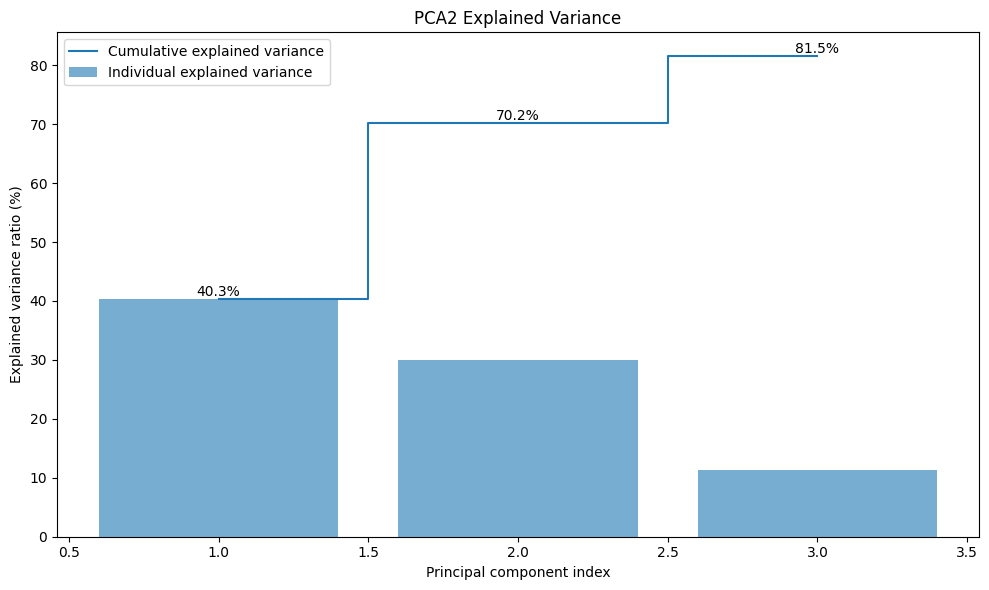

In [ ]:
# Standardize the data
# We are not aware of the nature of the data such as what their units are so it is a good practice to scale them
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply SECOND PCA
pca2 = PCA(n_components=3)  # Reduced number of dimensions
pca2.fit(data_scaled)  # Fit the PCA on the scaled data
pca2_data = pca2.transform(data_scaled)  # Transform the data

# Variance Explained
cumulative_variance_pca2 = np.cumsum(pca2.explained_variance_ratio_)

print("Variance explained by each component:", pca2.explained_variance_ratio_)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(1, 4), pca2.explained_variance_ratio_ * 100, alpha=0.6, align='center',
        label='Individual explained variance')
plt.step(range(1, 4), cumulative_variance_pca2 * 100, where='mid',
         label='Cumulative explained variance')

# Labeling the cumulative variance percentages
for i, cv in enumerate(cumulative_variance_pca2):
    plt.text(i + 1, cv * 100, f"{cv*100:.1f}%", ha='center', va='bottom')

plt.ylabel('Explained variance ratio (%)')
plt.xlabel('Principal component index')
plt.title('PCA2 Explained Variance')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In the code below:

* The components variable retrieves the principal components from the pca2 object. Each principal component is a vector of coefficients corresponding to the original features. These coefficients (loadings) indicate the contribution of each feature to the principal component.

* The explaoined_variance retrieves the explained variance ratio for each principal component. The explained variance ratio indicates the proportion of the dataset's total variance that each principal component accounts for.

Insteadof simply printing out the eigenvectors we format them to be outputed as the correct equation format.


---

The for loop constructs the equation for each principal component:
*  The enumerate function is used with zip to iterate over the components and their corresponding explained variances simultaneously.
* For each coefficient in the component (comp), the sign is determined (+ if non-negative, - if negative). The absolute value of the coefficient is formatted to three decimal places.
* The terms are concatenated to form a string representing the equation of the principal component as 'equation'.
* The 'equation_str' string includes the principal component equation and the explained variance, formatted to one decimal place.

These are all added to the equations list, sorted on their variance and printed out accordingly. We ensured they match with the actual values as well.The values ahve been rounded to 3dp for visual clarity.


---

These are the equations listed in decreasing order of variance:
* PC1: - 0.556*X1 + 0.166*X2 - 0.560*X3 + 0.207*X4 - 0.554*X5 --> Variance: 40.3%
* PC2: - 0.076*X1 - 0.685*X2 - 0.219*X3 - 0.672*X4 - 0.159*X5 --> Variance: 29.9%
* PC3: - 0.583*X1 + 0.267*X2 - 0.137*X3 - 0.323*X4 + 0.682*X5 --> Variance: 11.3%

In [ ]:
# Extract the components and variance explained
components = pca2.components_
explained_variance = pca2.explained_variance_ratio_

print (f"At Dmin = 3, we have {len(components)} components: \n")

print("Actual values: ")
print(components)
print("\n")

# Prepare the formatted output
equations = []
for i, (comp, var) in enumerate(zip(components, explained_variance)):
    terms = []
    for j, coef in enumerate(comp):
        sign = " + " if coef >= 0 else " - "
        terms.append(f"{sign}{abs(coef):.3f}*X{j+1}")
    equation = "".join(terms)
    equation_str = f"PC{i+1}:{equation} --> Variance: {var*100:.1f}%"
    equations.append((var, equation_str))

# Sort equations by explained variance in decreasing order
equations.sort(reverse=True, key=lambda x: x[0])

print("Formatted equations: ")
# Print the equations
for _, eq in equations:
    print(eq)

At Dmin = 3, we have 3 components: 

Actual values: 
[[-0.55608777  0.16605693 -0.55968369  0.2074285  -0.55400277]
 [-0.07616798 -0.68491569 -0.21946827 -0.67209755 -0.15876868]
 [-0.58290436  0.2674771  -0.13665832 -0.32308723  0.68236182]]


Formatted equations: 
PC1: - 0.556*X1 + 0.166*X2 - 0.560*X3 + 0.207*X4 - 0.554*X5 --> Variance: 40.3%
PC2: - 0.076*X1 - 0.685*X2 - 0.219*X3 - 0.672*X4 - 0.159*X5 --> Variance: 29.9%
PC3: - 0.583*X1 + 0.267*X2 - 0.137*X3 - 0.323*X4 + 0.682*X5 --> Variance: 11.3%
